In [1]:
#Adding necessary libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
#Read Data
data=pd.read_csv('supermarket.csv',delimiter=",")
data.head()

,Invoice ID,Branch,City,Customertype,Gender,Productline,Unitprice,Quantity,Tax5%,Total,Date,Time,Payment,cogs,grossmarginpercentage,grossincome,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
#1.What is the total income for supermarket (each branch) ?

#Each branch
data.groupby('Branch').grossincome.sum()

Branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: grossincome, dtype: float64

In [4]:
#Total
data.grossincome	.sum()

15379.368999999999

In [5]:
#2.10 Most expensive shopping
a=data.nlargest(10, ['Total'])
a

,Invoice ID,Branch,City,Customertype,Gender,Productline,Unitprice,Quantity,Tax5%,Total,Date,Time,Payment,cogs,grossmarginpercentage,grossincome,Rating
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.650,1042.650,2/15/2019,14:53,Credit card,993.0,4.761905,49.650,6.6
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.490,1039.290,2/8/2019,16:20,Credit card,989.8,4.761905,49.490,8.7
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.260,1034.460,1/30/2019,20:23,Ewallet,985.2,4.761905,49.260,4.5
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.750,1023.750,1/12/2019,16:18,Ewallet,975.0,4.761905,48.750,8.0
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.690,1022.490,3/2/2019,17:16,Ewallet,973.8,4.761905,48.690,4.4
792,744-16-7898,B,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.685,1022.385,1/15/2019,13:48,Credit card,973.7,4.761905,48.685,4.9
422,271-88-8734,C,Naypyitaw,Member,Female,Fashion accessories,97.21,10,48.605,1020.705,2/8/2019,13:00,Credit card,972.1,4.761905,48.605,8.7
166,234-65-2137,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.790,1003.590,1/16/2019,13:32,Cash,955.8,4.761905,47.790,4.8
357,554-42-2417,C,Naypyitaw,Normal,Female,Sports and travel,95.44,10,47.720,1002.120,1/9/2019,13:45,Cash,954.4,4.761905,47.720,5.2
429,325-77-6186,A,Yangon,Member,Female,Home and lifestyle,90.65,10,45.325,951.825,3/8/2019,10:53,Ewallet,906.5,4.761905,45.325,7.3


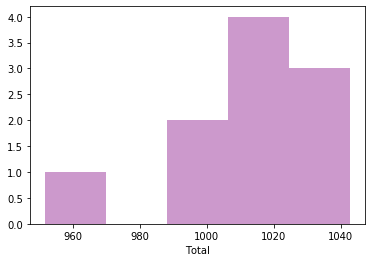

In [6]:
sns.distplot(a.Total,kde=False,color='Purple')

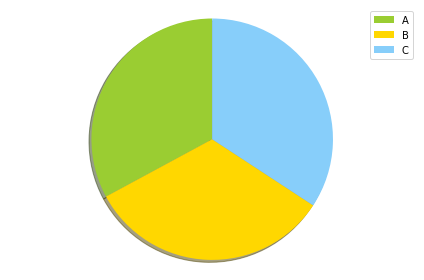

In [7]:
import matplotlib.pyplot as plt

labels = ['A', 'B', 'C']
sizes = [5057.1605,5057.0320,5265.1765]
colors = ['yellowgreen', 'gold', 'lightskyblue']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()


In [8]:
#5.Satılan urunlerinin kategorilerinin pie chart ile gosterilmesi
data.groupby('Productline').grossincome.sum()

Productline
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Sports and travel         2624.8965
Name: grossincome, dtype: float64

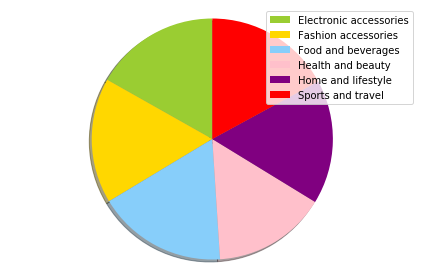

In [9]:
import matplotlib.pyplot as plt

labels = ['Electronic accessories', 'Fashion accessories', 'Food and beverages','Health and beauty','Home and lifestyle','Sports and travel']
sizes = [2587.5015,2585.9950,2673.5640,2342.5590,2564.8530,2624.8965]
colors = ['yellowgreen', 'gold', 'lightskyblue','pink','purple','red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [10]:
data['Date']= pd.to_datetime(data['Date'])

b=data.groupby(data['Date'].dt.strftime('%B'))['Total'].sum().sort_values()
b

Date
February     97219.374
March       109455.507
January     116291.868
Name: Total, dtype: float64

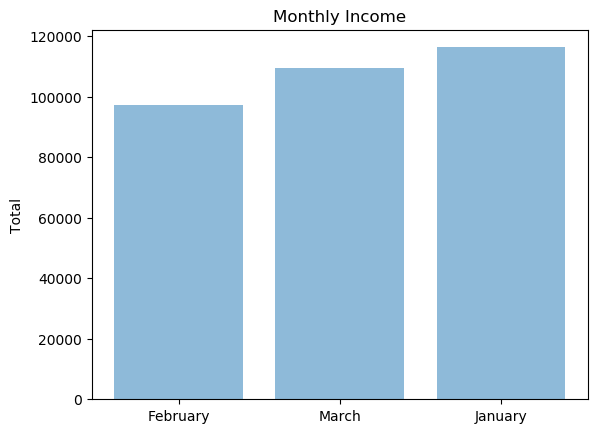

In [11]:
#Monthly Incomes
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('February', 'March', 'January')
y_pos = np.arange(len(objects))
performance = [97219.374,109455.507,116291.868]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Total')
plt.title('Monthly Income')

plt.show()

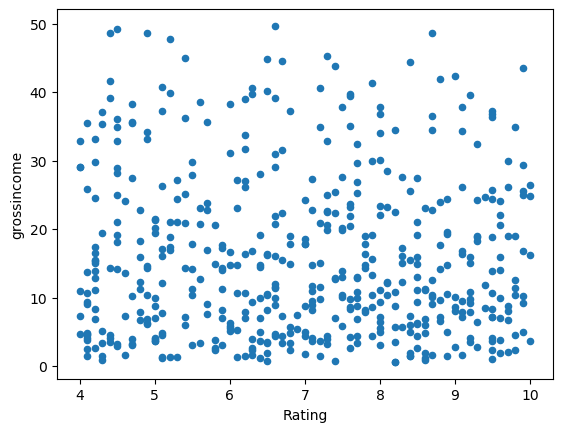

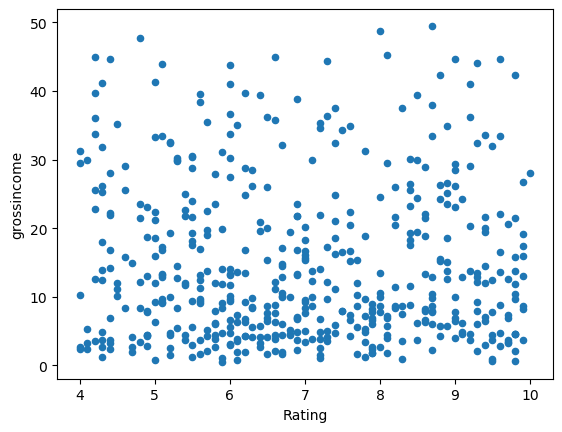

In [12]:
#Gender&Grossincome
data.query('Gender=="Female"').plot.scatter("Rating","grossincome")
data.query('Gender=="Male"').plot.scatter("Rating","grossincome")

In [13]:
#8 Yangon Earnings
yangon = pd.DataFrame(data)
yangon=data.query('City=="Yangon"')

In [14]:
yangon

,Invoice ID,Branch,City,Customertype,Gender,Productline,Unitprice,Quantity,Tax5%,Total,Date,Time,Payment,cogs,grossmarginpercentage,grossincome,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,2019-03-22,19:06,Credit card,282.80,4.761905,14.1400,4.5
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,2019-03-10,20:46,Ewallet,116.06,4.761905,5.8030,8.8
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


In [15]:
yangon['grossincome'].sum()

5057.1605

In [16]:
#9.Men most buy productline
men = pd.DataFrame(data)

In [17]:
men=data.query('Gender=="Male"')

In [18]:
men

,Invoice ID,Branch,City,Customertype,Gender,Productline,Unitprice,Quantity,Tax5%,Total,Date,Time,Payment,cogs,grossmarginpercentage,grossincome,Rating
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.1020,107.1420,2019-03-09,17:03,Cash,102.04,4.761905,5.1020,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,2019-03-10,20:46,Ewallet,116.06,4.761905,5.8030,8.8
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.7450,183.6450,2019-02-22,18:35,Ewallet,174.90,4.761905,8.7450,6.6
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7


In [19]:
men.groupby('Productline').Quantity.sum()

Productline
Electronic accessories    483
Fashion accessories       372
Food and beverages        438
Health and beauty         511
Home and lifestyle        413
Sports and travel         424
Name: Quantity, dtype: int64

In [20]:
#Credit Cart shopping average
credit_card=data.query('Payment=="Credit card"')
credit_card

,Invoice ID,Branch,City,Customertype,Gender,Productline,Unitprice,Quantity,Tax5%,Total,Date,Time,Payment,cogs,grossmarginpercentage,grossincome,Rating
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-01-10,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2019-02-20,13:27,Credit card,164.52,4.761905,8.2260,5.9
16,656-95-9349,A,Yangon,Member,Female,Health and beauty,68.93,7,24.1255,506.6355,2019-03-11,11:03,Credit card,482.51,4.761905,24.1255,4.6
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.7830,457.4430,2019-01-01,10:39,Credit card,435.66,4.761905,21.7830,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,156-20-0370,B,Mandalay,Normal,Female,Electronic accessories,25.45,1,1.2725,26.7225,2019-03-10,18:10,Credit card,25.45,4.761905,1.2725,5.1
979,151-33-7434,B,Mandalay,Normal,Female,Food and beverages,67.77,1,3.3885,71.1585,2019-02-04,20:43,Credit card,67.77,4.761905,3.3885,6.5
987,552-44-5977,B,Mandalay,Member,Male,Health and beauty,62.00,8,24.8000,520.8000,2019-01-03,19:08,Credit card,496.00,4.761905,24.8000,6.2
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.1480,633.1080,2019-01-28,15:46,Credit card,602.96,4.761905,30.1480,8.4


In [21]:
credit_card['Total'].sum()/len(credit_card)

324.0098778135048